# Multiple Linear Regression

So far we were just looking on simple linear regression problems. But within a linear regression model there could also be used more than one independent variable to describe the dependent variable. 
In this notebook we will look at our car dataset again but use more than one variable to predict mpg this time.

## Learning Objectives

At the end of this notebook you should be able to
- Apply multiple linear regression in python
- Interpret multiple linear regression models
- Explain why it is better to use **adjusted $R^2$** than $R^2$ to compare multiple linear regression models

# Multiple Regression: Formally defined
___
Multiple linear regression is very similar to simple linear regression except that the dependent variable $y$ is described by $k$ independent variables $x_1, \dots, x_k$  

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_k x_k + \varepsilon $$  

**Our predicted model**  

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1} x_1 + \hat{\beta_2} x_2 + \dots + \hat{\beta_k} x_k$$

* The interpretation of the intercept is the same  
* Slope $\hat{\beta_i}$ is the change in $y$ given a unit change in $x_i$ while **holding all other variables constant**  




# Multiple Regression in Python
___

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read in car dataset (as used in Notebook 1)
cars = pd.read_csv("data/cars_multivariate.csv",
                  na_values='?')
cars.head(n=2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


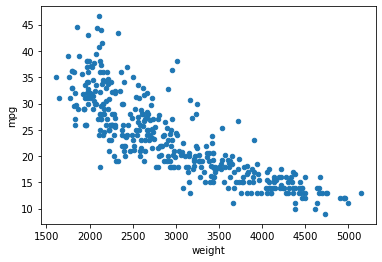

In [3]:
# We start with visualizing the relationship between weight and mpg in a scatterplot
cars.plot('weight', 'mpg', kind='scatter');

## 1 Simple Linear Regression

We start by setting up a simple linear regression model (using one independent variable).

In [4]:
# Import the statsmodels module
import statsmodels.api as sm

In [5]:
# Prepare data for modeling
# Choose the predictor X and add a constant term
X = cars[['weight']]
# Our model needs an intercept so we add a column of 1s:
X = sm.add_constant(X)
# Define dependent variable
y = cars.mpg

In [6]:
# Create an OLS model
model = sm.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

#Note: this can be written as sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 22 Nov 2021   Prob (F-statistic):          6.02e-102
Time:                        23:47:33   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Extra:**  
This same model can be fitted using **another syntax** to define model:


In [7]:
# "formula notation" (similar to R)
import statsmodels.formula.api as smf
# Define the model, fit the model, and generate the summary
smf.ols(formula='mpg ~ weight', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 22 Nov 2021   Prob (F-statistic):          6.02e-102
Time:                        23:47:33   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Did you notice, hat with this syntax we didn't need to add a "constant" to calculate the intercept? 

## 2 Multiple Regression  

Instead of using `weight` as the only independent variable to predict `mpg`, we might want to include other independent variables in the model.  

Let's try to add `horsepower` to the model.

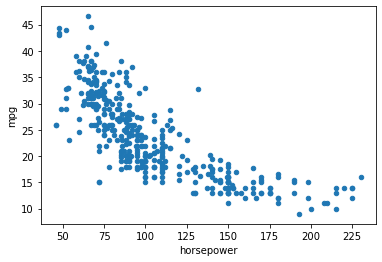

In [8]:
# Again, we start with visualizing the relationship between horsepower and mpg in a scatterplot
cars.plot('horsepower', 'mpg', kind='scatter');

In [9]:
# Prepare data for modeling
# This time, we define two independent variables as X. We name it X2 though, since X is already used above.  
X2 = cars[['horsepower', 'weight']]
X2 = sm.add_constant(X2)
# Our dependent variable stays the same
y = cars.mpg

In [10]:
# fit model and get model summery in one step
sm.OLS(y, X2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 22 Nov 2021   Prob (F-statistic):          3.06e-104
Time:                        23:47:33   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3 Model Interpretation

Our multiple regression model is give by  

$$ \hat{mpg} = 45.6402 - 0.0473 \times horsepower - 0.0058 \times weight $$

**Intercept:**  
The **Intercept** gives the mean value for $y$ when all $x=0$

**Slope**:

For each unit increase in $x$, the expected increase/decrease in $y$ 

In the case of multiple linear regression, we need to add "holding all other explanatory variables constant", since there are more than one exaplanatory variable in the model.



In [11]:
# The coefficients
sm.OLS(y, X2).fit().params

const         45.640211
horsepower    -0.047303
weight        -0.005794
dtype: float64

We would expect `mpg` to decrease by 0.047 as `horsepower` goes up by 1,  **holding `weight` constant**.

We would expect `mpg` to decrease by 0.006 as `weight` increases by 1, **holding `horsepower` constant**.

With our regression model, we can answer the following question: What is the predicted `mpg` for a car with 200 `horsepower` and a `weight` of 3500?

$$ \hat{mpg} = 45.6402 - 0.0473 (200) - 0.0058 (3500) = 15.88 $$  


We would expected the `mpg` of the car to be 15.88.
This can of course also be calculated with our model. We only need to call the `.predict()`function and name the values of X.

In [12]:
test_car = [1,200,3500]
sm.OLS(y, X2).fit().predict(test_car)

array([15.90008745])

**$\textbf{R}^2$**:  
Our model explains about 70% of the variation in `mpg`.  
This is a slightly better result than with the simple linear regression.

**Extra:**  
We can also use the other model syntax we have seen before with multiple linear regression:

In [13]:
# mpg explained by horsepower and weight
smf.ols(formula='mpg ~ horsepower + weight', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 22 Nov 2021   Prob (F-statistic):          3.06e-104
Time:                        23:47:33   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4 Multiple regression with more independent variables

Now let's try to predict `mpg` using `displacement`, `horsepower`, `weight` and `acceleration`. 

In [14]:
# Let*s first have a look at the correlation matrix
cars[['displacement', 'horsepower', 'weight', 'acceleration']].corr()

,displacement,horsepower,weight,acceleration
displacement,1.000000,0.897257,0.932994,-0.543800
horsepower,0.897257,1.000000,0.864538,-0.689196
weight,0.932994,0.864538,1.000000,-0.416839
acceleration,-0.543800,-0.689196,-0.416839,1.000000


You see that there are quite some correlations between these variables! These correlations can also be seen in the scatter plots:

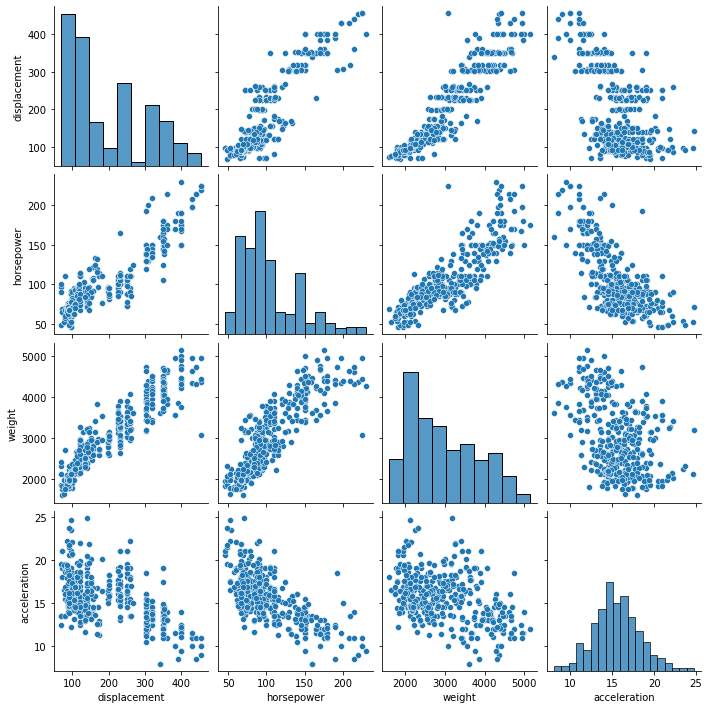

In [15]:
# We define a new X variable (X3) and plot some pairplots to see the correlations between all the variables (as well as their distributions)
X3 = cars[['displacement', 'horsepower', 'weight', 'acceleration']]
sns.pairplot(X3);


In [16]:
# Prepare data for modeling
# X3 is already defined, we still need to add the constand though:
X3 = sm.add_constant(X3)
y = cars.mpg

#fit model and get model summery in one step
sm.OLS(y, X3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Mon, 22 Nov 2021   Prob (F-statistic):          9.63e-102
Time:                        23:47:34   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 5 Task: Model interpretation
You should always question your model. Here are some questions you should be able to answer:

1) How good is the model fit?

With a R-squared of 0.707, 71% of the variance of the mpg is explained by the chosen independent variables

2) What is our regression equation?

$$ \hat{mpg} = 45.2511 - 0.0060 \times displacement - 0.0436 \times horsepower - 0.0053 \times weight - 0.0231 \times acceleration $$



<br>

<details><summary>
Click here for the solution
</summary>
(copy the lines below to a markdown cell)
$$ \hat{mpg} = 45.2511 - 0.0060 \times displacement - 0.0436 \times horsepower - 0.0053 \times weight - 0.0231 \times acceleration $$
</details>


3) How do we interpret the model?

We have a look at the coefficients of the independent variables to see their influence on mpg,  
check for the significance of their influence,  
and have a look at the R-squared to know the overall proportion of the variance for mpg that's explained by the independent variables.

4) Is it a good idea to include `displacement` in the model?

Displacement has a p-value of 0.372, which indicates no significant and therefore neglectable correlation of displacement and mpg.

# deep Dive: $R^2$ 
___

With more variables, our $R^2$ git slightly better. Should we always just put as many variables as possible in our model?

This is a not great idea 💡. We want to summarize and predict - __and__ we want to do it in the simplest possible way. 

In [17]:
# R_squared for one independent variable
rs = smf.ols(formula='mpg ~ horsepower', data=cars).fit().rsquared
f'{rs:.3}'

'0.606'

In [18]:
# R_squared for two independent variables
rs = smf.ols(formula='mpg ~ horsepower + weight', data=cars).fit().rsquared
f'{rs:.3}'

'0.706'

In [19]:
# R_squared for four independent variables
rs = smf.ols(formula='mpg ~ displacement + horsepower + weight + acceleration', data=cars).fit().rsquared
f'{rs:.3}'

'0.707'

## Adjusted $R^2$  

The adjusted $R^2$ is designed to build in an automatic penalty for adding an $X$.  

$$R_a^2 = 1 - \frac{\frac{1}{n - k - 1} SSE}{\frac{1}{n - 1} SST} $$  

We use adjusted $R^2$ when we compare models with different numbers of independent variables.

$R^2$ penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

**Final question:**  
According to the adjusted $R^2$, which is the best model we have fitted so far? Calculate adjusted $R^2$ for the former three models!

Summary
-----

- We extend the linear regression model to include many explanatory variables (Xs).
- All explanatory variables should be independent of each other.
- $R^2$ allows use to measure how good a model fits the data.
- Adjusted $R^2$ penalizes adding non-useful explanatory variables. And is used to compare models with different numbers of independent variables.

----
Bonus Material
----

### The Overall F Test  

Instead of testing if one independent variable is useful for predicting the dependent variable, we might want to test if the model as a whole is useful for predicting the dependent variable.  

For that, we use the F test.  

* It tests the null hypothesis:  

$$ H_0: \beta_1 = \beta_2 = \dots = \beta_k = 0$$  

* Under the null hypothesis, there are no $X$ variables in the model.  

* The alternative hypothesis:  

$$ H_a: \text{ at least one } \beta_i \neq 0 $$  

**Test statistic**  

$$f = \frac{\frac{SSR}{k}}{\frac{SSE}{(n - k - 1)}}$$ 

The larger the value of $f$, the stronger the evidence to reject the null.  

The test statistic follows an F distribution, and we find the p-value by comparing the test statistic to an F distribution with degress of freedom $k$ and $n - k - 1$.   

We will simply read the p-value from the regression output. (Score!)

In [20]:
sm.OLS(y, X3).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Mon, 22 Nov 2021   Prob (F-statistic):          9.63e-102
Time:                        23:47:34   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2511      2.456     18.424      0.000      40.422      50.080
displacement    -0.0060      0.007     -0.894      0.372      -0.019       0.007
horsepower      -0.0436      0.017     -2.631      0.009      -0.076      -0.011
weight          -0.0053      0.001     -6.512      0.000      -0.007      -0.004
acceleration    -0.0231      0.126     -0.184      0.854      -0.270       0.224
==============================================================================
Omnibus:                       38.359   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.333
Skew:                           0.715   Prob(JB):                     7.13e-12
Kurtosis:                       4.049   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$\text{F-statistic} = 233.4$$
$$\text{p-value} = 9.63 \times 10^{-102} $$   

We have extremely strong evidence to conclude that the at least one of the variables in the model is useful for predicting `mpg`.

Is Model 1 (with one variable `horsepower`) useful for predicting `mpg`?

In [21]:
# Add the model here and answer the questions by looking at the regression results

smf.ols(formula='mpg ~ horsepower', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           7.03e-81
Time:                        23:47:34   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As a rule of thumb, the standards for R-Squared are the following:
- a R-Squared above 0.7 is generally be seen as showing a high level of correlation,
- a measure below 0.4 would show a low correlation.  

This means, our model has an acceptable explanatory value.

Is Model 2 (with two variables `horsepower` and `weight`) useful for predicting `mpg`?

In [22]:
# Add the model here and answer the questions by looking at the regression results

smf.ols(formula='mpg ~ horsepower + weight', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 22 Nov 2021   Prob (F-statistic):          3.06e-104
Time:                        23:47:34   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model has an even better explanatory value than with horsepower alone.